In [0]:
# Name: Diana Olivas
# I worked on this code with: Ellie Mehrara and Kaitlyn McFarland

# Please do all of your work for this week's lab in this worksheet. If
# you wish to create other worksheets for scratch work, you can, but
# this is the one that will be graded. You do not need to do anything
# to turn in your lab. It will be collected by your TA at the beginning
# of (or right before) next week’s lab.

# Be sure to clearly label which question you are answering as you go and to
# use enough comments that you and the grader can understand your code.


In [17]:
#1

def dde_solve(dde, statevar, delayedvars, history, tmax, timestep):
    # Check validity of delays.
    if min(delayedvars.values()) < 0:
        raise ValueError("This function will not work with negative delays. "
            "Consider consulting a fortune teller instead.")
    if any(val<timestep for val in delayedvars.values()):
        raise ValueError("Time step should not be larger than delay.")

    # Set up variables and delays.

    delayedvars = delayedvars.items()
    dde = dde.subs({v: statevar for v, delay in delayedvars if delay == 0})
    delayedvars = [(v, delay) for v, delay in delayedvars if delay != 0]
    allvars = [str(statevar)] + [str(v) for v, delay in delayedvars]
    delays = [delay for v, delay in delayedvars]

    # Set up fast functions.
    dde_func = fast_float(dde, *allvars)
    history_func = fast_float(history, "t")

    # Adjust the timestep if necessary
    mindelay = min(delays) if delays else timestep
    timestepcorrectionfactor = ceil(timestep / mindelay)
    timestep /= timestepcorrectionfactor

    # A function to perform history lookups.
    def lookup(t):
        """Does a history lookup at each delay from t, stores result in allvars[1:]"""
        for i, delay in enumerate(delays):
            if t - delay <= 0:
                allvars[i+1] = history_func(t - delay)
            else:
                r = (t - delay) / timestep
                n = floor(r)
                r -= n
                allvars[i+1] = result[n]*(1 - r) + result[n + 1]*r

    # Set up for the first iteration.
    result = [history_func(0)]
    lookup(0)
    for t in sxrange(0, tmax - timestep, timestep):
        # Compute k1. Note history lookup has already been done.
        allvars[0] = result[-1]
        k1 = dde_func(*allvars)
        # Compute k2.
        lookup(t + timestep/2)
        allvars[0] += timestep/2 * k1
        k2 = dde_func(*allvars)
        # Compute k3. Note history lookup has already been done.
        allvars[0] = result[-1] + timestep/2 * k2
        k3 = dde_func(*allvars)
        # Compute k4.
        lookup(t + timestep)
        allvars[0] = result[-1] + timestep * k3
        k4 = dde_func(*allvars)
        # Finally, compute the RK4 weighted average.
        result.append(result[-1] + (k1 + 2*k2 + 2*k3 + k4)/6 * timestep)
    return result[::timestepcorrectionfactor]

In [18]:
#Exercise 2
menu={"Ice Cream":4.95, "Cookies":2, "Candy":1}

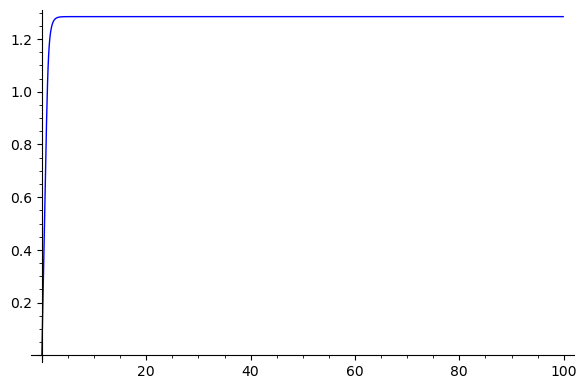

In [19]:
# Exercise 3
var("X")
var("tx")
Vmax=80
h=400
n=5
sol=dde_solve(1 - X * tx^5 / (1 + tx^5), X, {tx:0.2}, history=0, tmax=100, timestep=0.1)
list_plot(list(zip(srange(0,100,0.1), sol)), plotjoined=True)

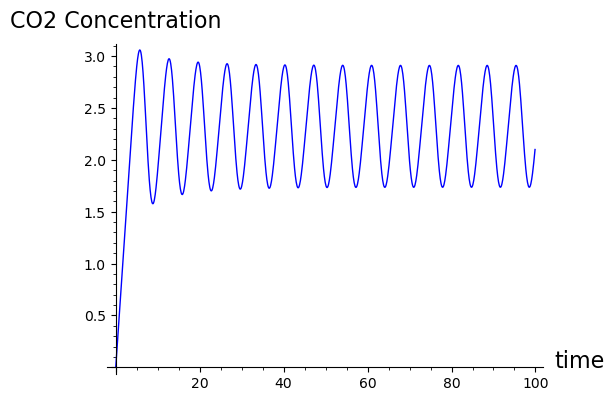

In [20]:
#Exercise 4
var("X","xt")
L=6
Vmax=80
a=0.2
h=400
tx2=0.2
t=srange(0,100,0.1)
tstep=.01
n=5
MackeyGlassBr=L-(Vmax * tx^n)/(h+tx^n)*a*X
delay={tx:tx2}
sol=dde_solve(MackeyGlassBr,X,delay,history=0,tmax=100,timestep=tstep)
list_plot(list(zip(t,sol)),axes_labels=["time","CO2 Concentration"],plotjoined=True)

In [21]:
t=srange(0,100,0.1)
breath=[]
for i in sol:
         breath.append((80*i^5)/(400+i^5))

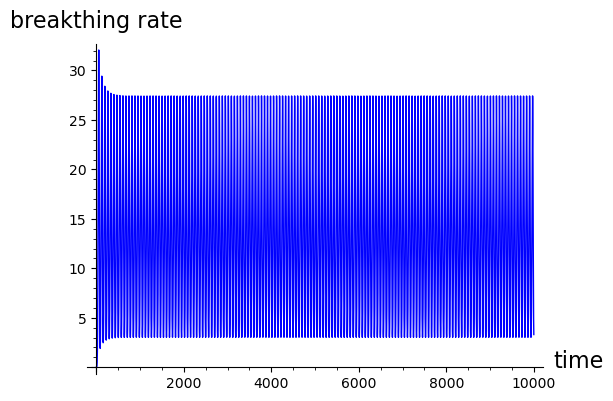

In [22]:
#Exercise 5
list_plot(breath, plotjoined=True,axes_labels=["time","breakthing rate"])

In [23]:
#I saw sharp and persistent oscillations

SyntaxError: invalid syntax (<ipython-input-23-2d7c3e3e9c5f>, line 1)

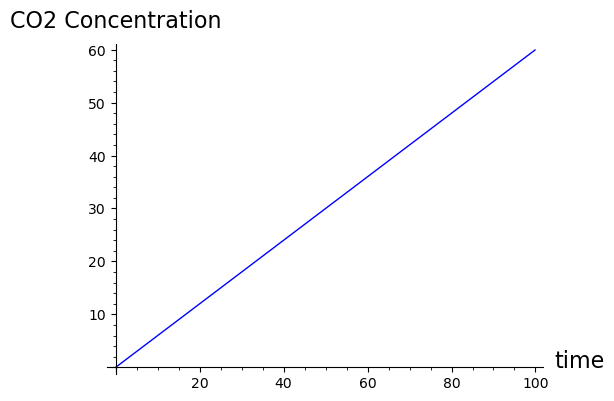

In [24]:
#Exercise 6
var("X","xt")
L=6
Vmax=80
a=0.2
h=400
tx2=20
t=srange(0,100,0.1)
tstep=.01
n=5
MackeyGlassBr=L-(Vmax * tx^n)/(h+tx^n)*a*X
delay={tx:tx2}
sol=dde_solve(MackeyGlassBr,X,delay,history=0,tmax=100,timestep=tstep)
list_plot(list(zip(t,sol)),axes_labels=["time","CO2 Concentration"],plotjoined=True)

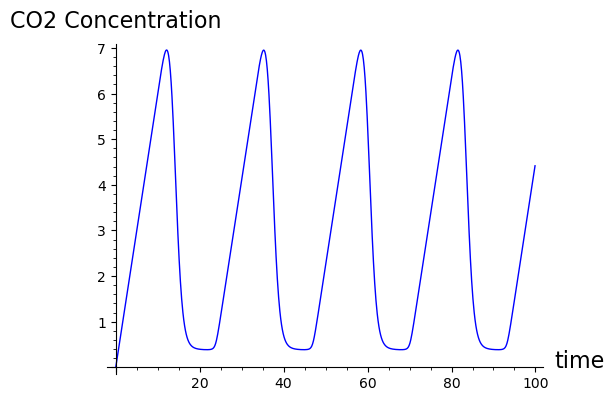

In [25]:
var("X","xt")
L=6
Vmax=80
a=0.2
h=400
tx2=0.9
t=srange(0,100,0.1)
tstep=.01
n=5
MackeyGlassBr=L-(Vmax * tx^n)/(h+tx^n)*a*X
delay={tx:tx2}
sol=dde_solve(MackeyGlassBr,X,delay,history=0,tmax=100,timestep=tstep)
list_plot(list(zip(t,sol)),axes_labels=["time","CO2 Concentration"],plotjoined=True)

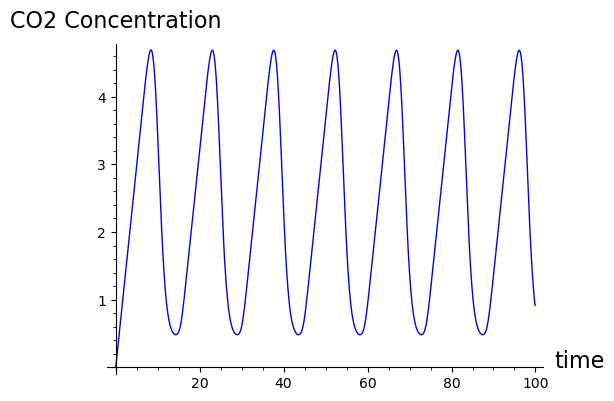

In [26]:
var("X","xt")
L=6
Vmax=80
a=0.2
h=400
tx2=0.5
t=srange(0,100,0.1)
tstep=.01
n=5
MackeyGlassBr=L-(Vmax * tx^n)/(h+tx^n)*a*X
delay={tx:tx2}
sol=dde_solve(MackeyGlassBr,X,delay,history=0,tmax=100,timestep=tstep)
list_plot(list(zip(t,sol)),axes_labels=["time","CO2 Concentration"],plotjoined=True)

In [27]:
#Exercise 7
@interact
def tauslider(g=(.1,1,0.01)):
    t=srange(0,100,.01)
    var ("x,xtau")
    eqn=6-((80*xtau^5)/(400+(xtau)^5)*0.2*x)
    sol1=dde_solve(eqn, x, {xtau:g}, history=0, tmax=100, timestep=.01)
    p = list_plot(list(zip(t,sol1)), plotjoined=True, axes_labels=["time", "CO2 Concentration"])
    show(p)

Interactive function <function tauslider at 0x7f21e0de7040> with 1 widget
  g: FloatSlider(value=0.55, descrip…

In [28]:
#A change to persistent?sharp oscillations happens when tau(tx) is less than 0.18

In [29]:
#Exercise 8
#n controls sensitivity and steepness(sharp) as well as the value to which xtau is raised

In [30]:
#Exercise 9
@interact
def tauslider(n=(1,20,0.1),g=(0.1,1,0.01)):
    t=srange(0,100,.01)
    var("x,xtau")
    eqn=6-((80*xtau^5)/(400+(xtau)^5)*0.2*x)
    sol1= dde_solve(eqn, x, {xtau:g}, history=0, tmax=100, timestep=0.01)
    p = list_plot(list(zip(t,sol1)), plotjoined=True, axes_labels=["time", "CO2 Concentration"])
    show(p)

Interactive function <function tauslider at 0x7f21e11d1ee0> with 2 widgets
  n: FloatSlider(value=10.0, descri…

In [31]:
#Persisent osciallations occur at tau 0.18

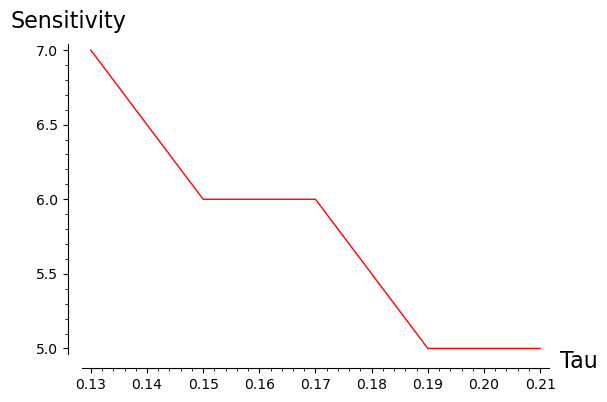

In [32]:
#Exercise 11
tx=[0.13,0.15,0.17,0.19,0.21]
sense=[7,6,6,5,5]
#18"
list_plot(list(zip(tx,sense)),plotjoined=True,axes_labels=["Tau","Sensitivity"],color="red")